In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# main function
class MLP():
    def __init__(self,L,m, lr = 0.001, max_epochs = 800000, batch_size = 1):
        # network parameters
        self.lr = lr # learning rate
        self.max_epochs = max_epochs # maximum number of iterations
        self.batch_size = batch_size # batch size of input of each training process
        self.m = m # number of neurons in each hidden layer
        self.L = L # number of hidden layers
        
    def init_params(self, X):
        # initialize parameters
        np.random.seed(0) # set a seed
        self.n, self.p = X.shape[0], X.shape[1] # shape of input matrix
        self.W, self.b = [], [] # use list to store parameters
        self.W.append(np.random.randn(self.p, self.m[0])*0.01) # initialize the first layer
        self.b.append(np.random.randn(self.m[0])) 
        for i in range(self.L-1): # initialize the L-1 hidden layers
            self.W.append(np.random.randn(self.m[i], self.m[i+1])*0.01)
            self.b.append(np.random.randn(self.m[i+1])*0.01)
        self.W.append(np.random.randn(self.m[self.L-1], 1)*0.01) # initialze the output layer
        self.b.append(np.random.randn(1)) 
        
    def net(self,X):
        # forward propagation
        H,A = [],[] # use list to store output of each layer
        H.append(X@self.W[0] +self.b[0])
        A.append(Relu(H[0])) # output of the first layer
        for i in range(self.L-1): # output of the L-1 hidden layers
            H.append(A[i]@self.W[i+1] +self.b[i+1])
            A.append(Relu(H[i+1]))
        output = A[self.L-1]@self.W[self.L] +self.b[self.L] # output of the last layer
        return H,A,output
        
    def back_prop(self,x,y,H,A,output):
        # backward propagation
        s = []
        Ms = []
        err = (y - output.reshape(y.shape)).reshape(-1,1)
        s.append(-2*err)
        for i in range(self.L):
            Ms.append(d_Relu(H[i]))
        for j in range(self.L):
            s.append(np.multiply(np.dot(s[j],self.W[self.L-j].T),Ms[self.L-j-1]))
        for k in range(self.L):
            self.W[self.L-k] = self.W[self.L-k] - self.lr*np.dot(A[self.L-k-1].T,s[k]).reshape(self.W[self.L-k].shape)/len(y)
            self.b[self.L-k] = self.b[self.L-k] - self.lr*s[k].mean(0).reshape(self.b[self.L-k].shape)
        self.W[0] = self.W[0] - self.lr*np.dot(x.T,s[self.L]).reshape(self.W[0].shape)/len(y)
        self.b[0] = self.b[0] - self.lr*s[self.L].mean(0).reshape(self.b[0].shape)
        
    def train(self,X,Y):
        self.train_loss=[] # record training acc
        self.MSE_rec =[] # record test error
        self.init_params(X) # initialize the model
        for epoch in range(self.max_epochs):
            for x, y in data_iteration(self.batch_size, X, Y): # Iterate over each data batch
                H,A,output = self.net(x) # feeding forward
                self.back_prop(x,y,H,A,output) # backpropagating
            _,_,output = self.net(X)
            l = square_loss(Y,output).mean() # calculate the mean square error over all observations
            self.train_loss.append(l)
            #if (epoch+1)%100 == 0:
            print(f'epoch {epoch + 1}, loss {l:f}') # print the training loss
        
def square_loss(y,y_hat):
    return (y-y_hat.reshape(y.shape))**2/2

def data_iteration(batchSize, X, y): # data iteration
    n = len(y)
    index = list(range(n))
    np.random.shuffle(index)
    for i in range(0, n, batchSize):
        batch_index = index[i:min(n, i+batchSize)]
        yield X[batch_index], y[batch_index]
        
#other functions        
## activation functions
def Relu(X):
    a = np.zeros_like(X)
    return np.maximum(X,a)

## derivative of activation functions
def d_Relu(x):
    return np.where(x >= 0, 1, 0)

In [3]:
# Generate Training data
from scipy.stats import multivariate_normal
def X_data_generation(r, samples, features):
    a = np.zeros((features, features))
    b = a.copy()
    
    for i in range(features):
        a[i, :] = i + 1
    
    for j in range(features):
        b[:, j] = j + 1
    
    dc = r**np.abs(a - b)
    mean_vector = np.zeros(dc.shape[0])
    X = multivariate_normal.rvs(mean=mean_vector, cov=dc, size=samples)
    
    return X

def beta_initiate(features):
    s = np.concatenate((np.linspace(1, 2.9, features), np.linspace(-2.9, -1, features)))
    theta = np.matrix(np.random.choice(s, size=features)).T
    theta[4, 0] = 1.1
    
    return theta

def Y_data_generation(X, beta):
    ebr = np.random.normal(0, 1, size=(X.shape[0],1))
    Y = X@beta + ebr
    return Y

In [4]:
# generate training data
r = 0.5
samples = 30
features = 50

X = X_data_generation(r, samples, features)
init_beta = beta_initiate(features)
y = Y_data_generation(X, init_beta)
#y = np.array(y).reshape(len(y))

In [5]:
X.shape,y.shape,y.reshape(-1)

((30, 50),
 (30, 1),
 matrix([[ -9.72640615,   3.01338074,  25.92182562, -11.96674752,
          -30.34891524, -15.64615919,  -0.6209852 ,   0.94426686,
           19.18881439, -10.91867558,  -9.08131766, -33.26858009,
           -4.41640674,  -8.29854828,  -2.2821301 , -16.9757343 ,
           13.47501384, -11.80513234, -14.05283336,  -5.89650105,
            6.55768205,  -4.17455088,   3.03990664,  12.32893714,
          -20.16850289,   5.09165668,  25.68052214, -15.53796465,
           -9.63322966,   0.07288644]]))

In [6]:
start_time = time.time()
# initialize MLP
mlp = MLP(batch_size=2,max_epochs= 1000,lr=0.001,L=1,m=[20])
# train the model
mlp.train(np.array(X),np.array(y))
end_time = time.time()

epoch 1, loss 106.427244
epoch 2, loss 91.171803
epoch 3, loss 65.435718
epoch 4, loss 45.824080
epoch 5, loss 37.241306
epoch 6, loss 34.217750
epoch 7, loss 32.785465
epoch 8, loss 31.453106
epoch 9, loss 30.493725
epoch 10, loss 29.781509
epoch 11, loss 29.170740
epoch 12, loss 28.566677
epoch 13, loss 27.982081
epoch 14, loss 27.366154
epoch 15, loss 26.586609
epoch 16, loss 25.457036
epoch 17, loss 23.780299
epoch 18, loss 21.287527
epoch 19, loss 17.684236
epoch 20, loss 13.136933
epoch 21, loss 8.537017
epoch 22, loss 4.912359
epoch 23, loss 2.701440
epoch 24, loss 1.532747
epoch 25, loss 0.936059
epoch 26, loss 0.604738
epoch 27, loss 0.369346
epoch 28, loss 0.245106
epoch 29, loss 0.173378
epoch 30, loss 0.122569
epoch 31, loss 0.090726
epoch 32, loss 0.061632
epoch 33, loss 0.046024
epoch 34, loss 0.038228
epoch 35, loss 0.026119
epoch 36, loss 0.019853
epoch 37, loss 0.015071
epoch 38, loss 0.011813
epoch 39, loss 0.010036
epoch 40, loss 0.006886
epoch 41, loss 0.006934
epoc

epoch 339, loss 0.000026
epoch 340, loss 0.000026
epoch 341, loss 0.000025
epoch 342, loss 0.000025
epoch 343, loss 0.000025
epoch 344, loss 0.000025
epoch 345, loss 0.000025
epoch 346, loss 0.000025
epoch 347, loss 0.000025
epoch 348, loss 0.000025
epoch 349, loss 0.000025
epoch 350, loss 0.000025
epoch 351, loss 0.000025
epoch 352, loss 0.000025
epoch 353, loss 0.000025
epoch 354, loss 0.000025
epoch 355, loss 0.000025
epoch 356, loss 0.000025
epoch 357, loss 0.000025
epoch 358, loss 0.000025
epoch 359, loss 0.000025
epoch 360, loss 0.000025
epoch 361, loss 0.000025
epoch 362, loss 0.000024
epoch 363, loss 0.000024
epoch 364, loss 0.000024
epoch 365, loss 0.000024
epoch 366, loss 0.000024
epoch 367, loss 0.000024
epoch 368, loss 0.000024
epoch 369, loss 0.000024
epoch 370, loss 0.000024
epoch 371, loss 0.000024
epoch 372, loss 0.000024
epoch 373, loss 0.000024
epoch 374, loss 0.000024
epoch 375, loss 0.000024
epoch 376, loss 0.000024
epoch 377, loss 0.000024
epoch 378, loss 0.000024


epoch 738, loss 0.000012
epoch 739, loss 0.000012
epoch 740, loss 0.000012
epoch 741, loss 0.000012
epoch 742, loss 0.000012
epoch 743, loss 0.000012
epoch 744, loss 0.000012
epoch 745, loss 0.000012
epoch 746, loss 0.000012
epoch 747, loss 0.000012
epoch 748, loss 0.000012
epoch 749, loss 0.000012
epoch 750, loss 0.000012
epoch 751, loss 0.000012
epoch 752, loss 0.000011
epoch 753, loss 0.000011
epoch 754, loss 0.000011
epoch 755, loss 0.000011
epoch 756, loss 0.000011
epoch 757, loss 0.000011
epoch 758, loss 0.000011
epoch 759, loss 0.000011
epoch 760, loss 0.000011
epoch 761, loss 0.000011
epoch 762, loss 0.000011
epoch 763, loss 0.000011
epoch 764, loss 0.000011
epoch 765, loss 0.000011
epoch 766, loss 0.000011
epoch 767, loss 0.000011
epoch 768, loss 0.000011
epoch 769, loss 0.000011
epoch 770, loss 0.000011
epoch 771, loss 0.000011
epoch 772, loss 0.000011
epoch 773, loss 0.000011
epoch 774, loss 0.000011
epoch 775, loss 0.000011
epoch 776, loss 0.000011
epoch 777, loss 0.000011


In [7]:
execution_time = end_time - start_time
print(f"代码执行时间为: {execution_time} 秒")

代码执行时间为: 1.698301076889038 秒


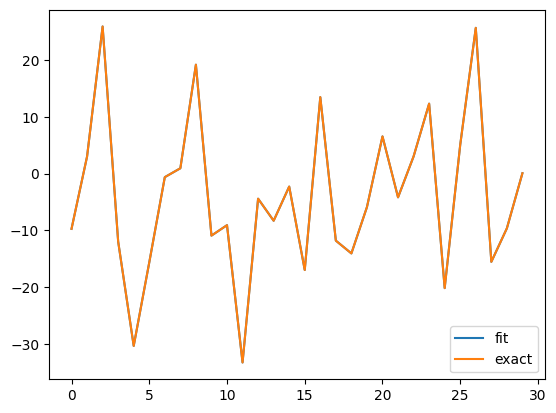

In [8]:
# fitted value vs exact value at t1
_,_,H3 = mlp.net(X)
plt.figure()
plt.plot(H3,label="fit")
plt.plot(np.array(y),label="exact")
plt.legend()

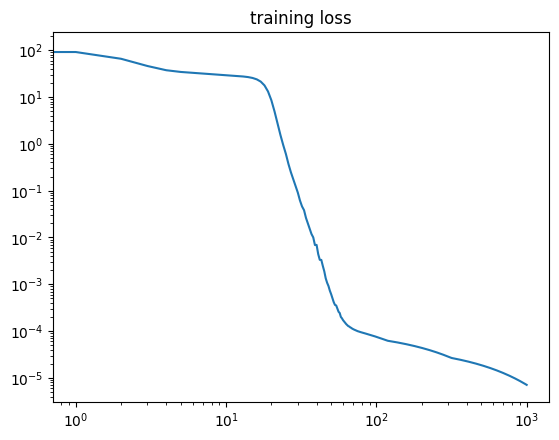

In [9]:
# training loss vs epochs
plt.figure()
all_figures = []
plt.loglog(np.array(mlp.train_loss))
plt.title('training loss')
all_figures.append(plt.gcf())